# Convergence Tests

In [1]:
using Plots, Measures, Printf
theme(:wong2)
using Interpolations
using LaTeXStrings
include("../misc-tsv.jl")

Main.MiscTSV

## In Sum

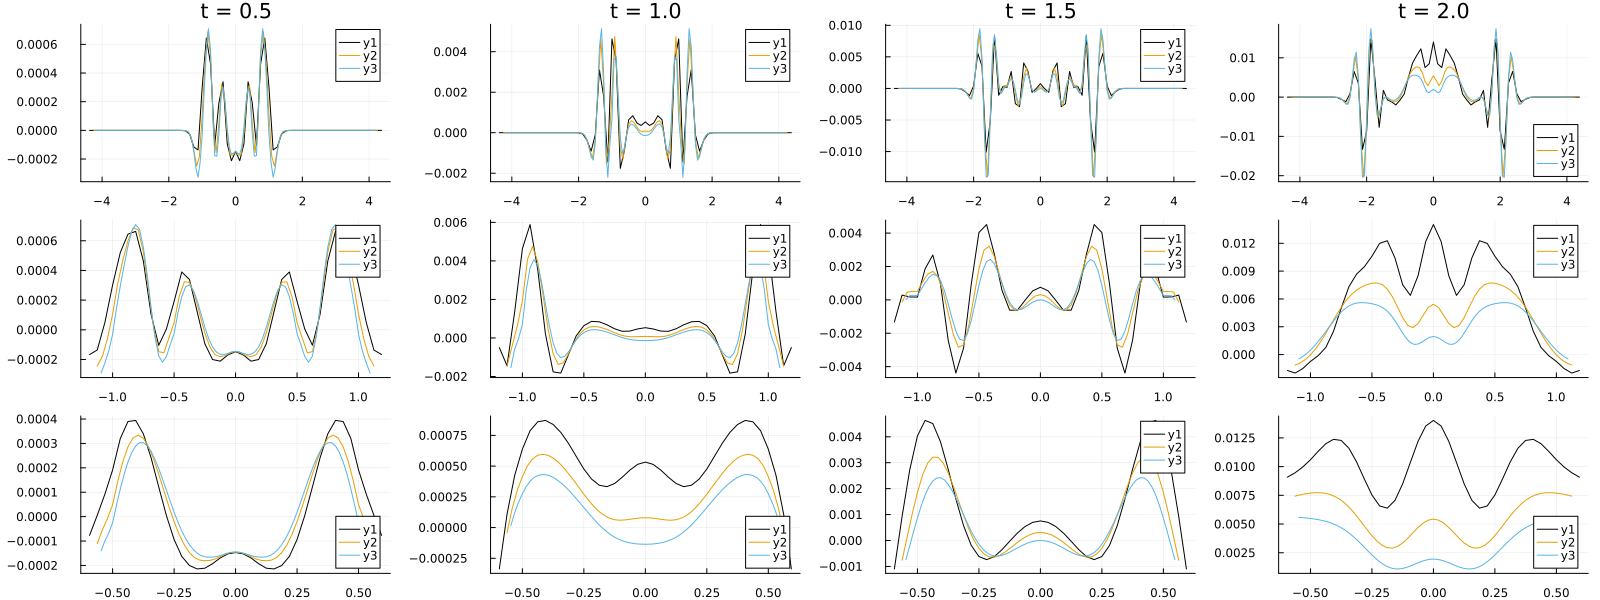

In [2]:
conv_order = 4
conv_bases = [1, 1.5, 2]
dirs = [
    ("ScalarWave/Conv/3levels/gaussian_64/output-0000/gaussian_64/", "low"),
    ("ScalarWave/Conv/3levels/gaussian_96/output-0000/gaussian_96/", "med"),
    ("ScalarWave/Conv/3levels/gaussian_128/output-0000/gaussian_128/", "high"),
]
plts = []
for l in [0, 1, 2]
    for t in [0.5, 1.0, 1.5, 2.0]
        (dats, labs) = MiscTSV.load_data_1d(dirs, t; level=l, ngh=0, prefix="testsubcyclingmc2-error")
        plt = plot()
        for i in 1:length(dats)
            x = dats[i][1]
            err = dats[i][2]
            plt = plot!(x, err * (conv_bases[i]^conv_order))
        end
        if l == 0
            plt = plot!(title="t = $t")
        end
        push!(plts, plt)
    end
end
plot_grid = plot(plts..., layout=(3,4), size=(1600, 600))
display(plot_grid)

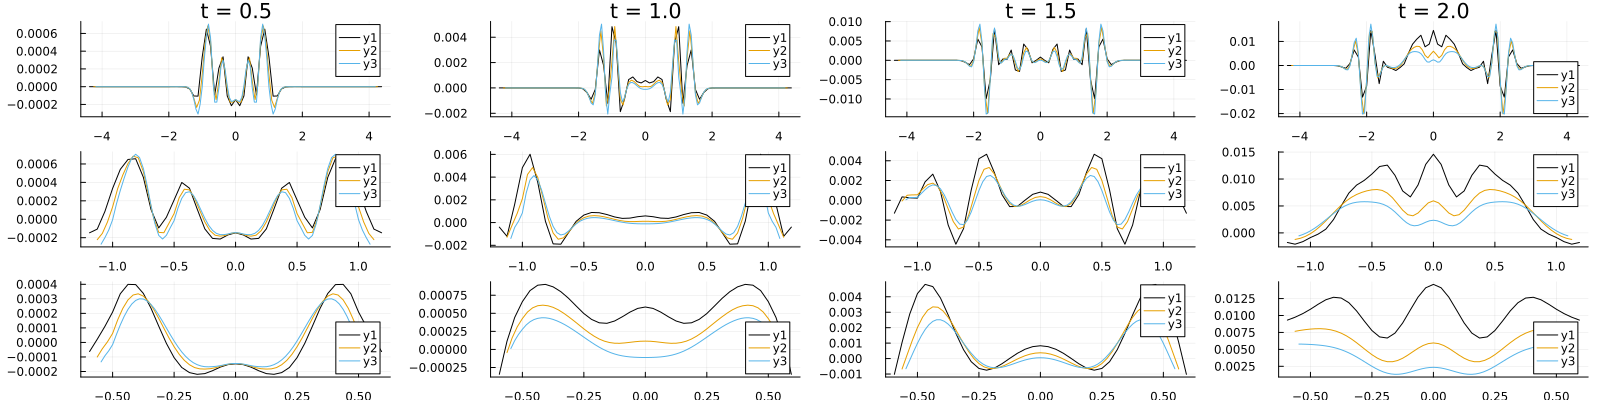

In [3]:
conv_order = 4
conv_bases = [1, 1.5, 2]
dirs = [
    ("ScalarWave/Conv/3levels/gaussian-noSC_64/output-0000/gaussian-noSC_64/", "low"),
    ("ScalarWave/Conv/3levels/gaussian-noSC_96/output-0000/gaussian-noSC_96/", "med"),
    ("ScalarWave/Conv/3levels/gaussian-noSC_128/output-0000/gaussian-noSC_128/", "high"),
]
plts = []
for l in [0, 1, 2]
    for t in [0.5, 1.0, 1.5, 2.0]
        (dats, labs) = MiscTSV.load_data_1d(dirs, t; level=l, ngh=0, prefix="testsubcyclingmc2-error")
        plt = plot()
        for i in 1:length(dats)
            x = dats[i][1]
            err = dats[i][2]
            plt = plot!(x, err * (conv_bases[i]^conv_order))
        end
        if l == 0
            plt = plot!(title="t = $t")
        end
        push!(plts, plt)
    end
end
plot_grid = plot(plts..., layout=(3,4), size=(1600, 400))
display(plot_grid)

## For Paper

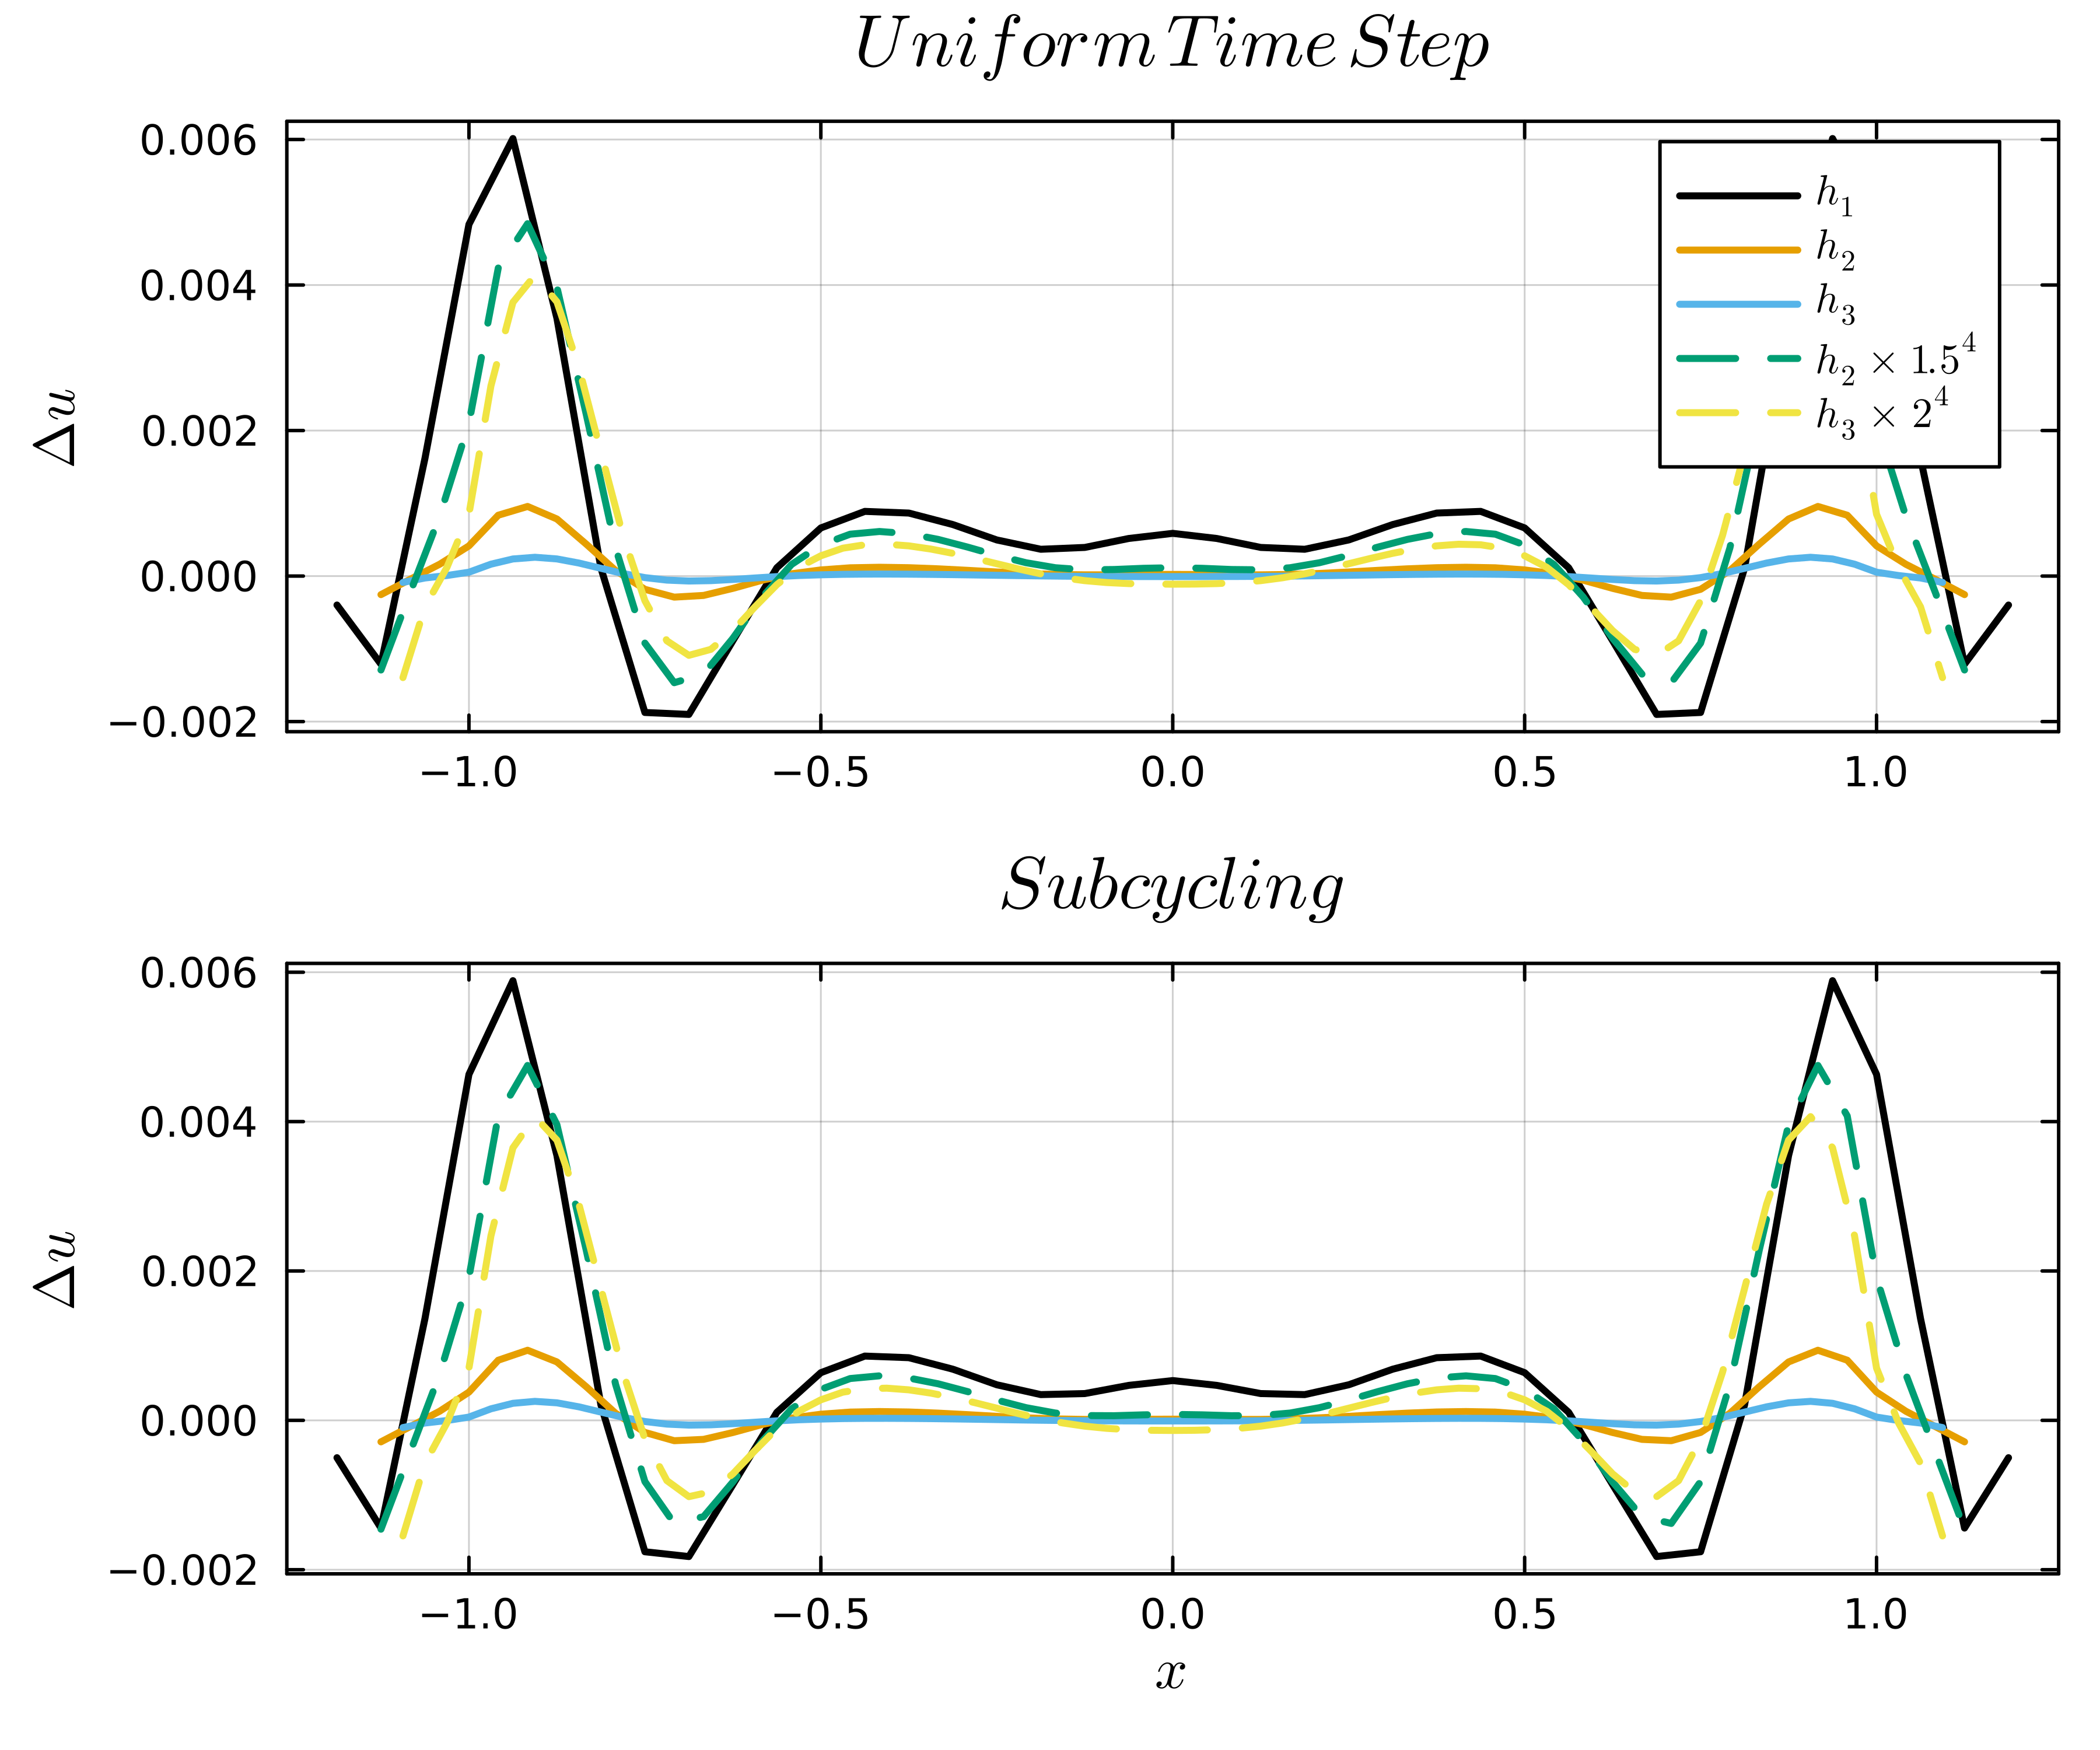

In [6]:
conv_order = 4
conv_bases = [1, 1.5, 2]
plts = []
let l=1, t=1.0, dirss,
    dirss = [
        [
            ("ScalarWave/Conv/3levels/gaussian-noSC_64/output-0000/gaussian-noSC_64/", "low"),
            ("ScalarWave/Conv/3levels/gaussian-noSC_96/output-0000/gaussian-noSC_96/", "med"),
            ("ScalarWave/Conv/3levels/gaussian-noSC_128/output-0000/gaussian-noSC_128/", "high"),
        ],
        [
            ("ScalarWave/Conv/3levels/gaussian_64/output-0000/gaussian_64/", "low"),
            ("ScalarWave/Conv/3levels/gaussian_96/output-0000/gaussian_96/", "med"),
            ("ScalarWave/Conv/3levels/gaussian_128/output-0000/gaussian_128/", "high"),
        ],
    ]
    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t; level=l, ngh=0, prefix="testsubcyclingmc2-error")
        labs = [L"h_1", L"h_2", L"h_3"]
        plt = plot()
        for (i, dat) in enumerate(dats)
            lab = (j == 1) ? labs[i] : ""
            plt = plot!(dat[1], dat[2], linewidth=2, framestyle=:box, label=lab, ylabel=L"\Delta u")
        end
        scalelabs = [L"h_2\times 1.5^4", L"h_3\times 2^4"]
        for (i, dat) in enumerate(dats[2:3])
            lab = (j == 1) ? scalelabs[i] : ""
            plt = plot!(dat[1], dat[2] * (conv_bases[i+1]^conv_order),
                        linewidth=2, linestyle=:dash, label=lab)
        end
        plt = (j==1) ? plot!(title=L"Uniform\, Time\, Step") : plot!(title=L"Subcycling", xlabel=L"x")
        push!(plts, plt)
    end
end
plot_grid = plot(plts..., layout=(2,1), size=(600, 500), dpi=600)
# savefig(plot_grid, "ScalarWave-errors.png")
display(plot_grid)